In [141]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf

mat = scipy.io.loadmat('ex8data1.mat')

npX = np.array(mat['X'])
means = npX.mean(0)
stds = npX.std(0)

In [142]:
means

array([ 14.11222578,  14.99771051])

In [143]:
stds

array([ 1.35374717,  1.3075723 ])

In [144]:
x= np.arange(0,25)
y= np.arange(0,25)

def p(x, u, v):
    return np.exp(-(x - u)**2/2/v**2) / np.sqrt(2*np.pi*v**2)

X,Y = np.meshgrid(x,y)
Z = p(X, means[0], stds[0]) * p(Y, means[1], stds[1])


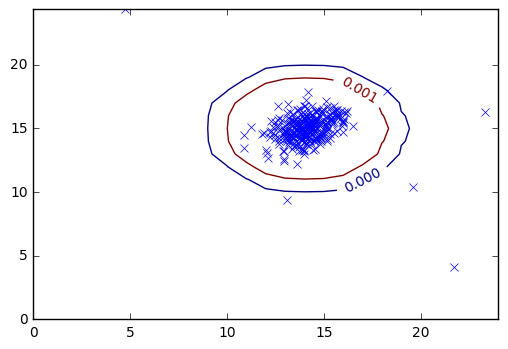

In [145]:
CS = plt.contour(X, Y, Z, [0.00008, 0.001])
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(npX[:, 0], npX[:, 1], 'x')

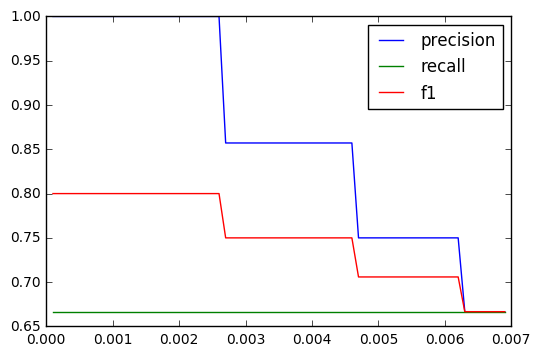

In [146]:
# Select threshold
npXval = np.array(mat['X'])
means = npXval.mean(0)
stds = npXval.std(0)
ps = p(npXval[:, 0], means[0], stds[0]) * p(npXval[:, 1], means[1], stds[1])

def calculate_scores(e):
    classification = ps < e
    cc = np.concatenate([classification.reshape(307, 1), np.array(mat['yval']).astype(bool)], axis=1)
    positives = cc[cc[:, 0] == True]
    negatives = cc[cc[:, 0] == False]
    true_positives = float(len(positives[positives[:, 1] == True]))
    false_positives = float(len(positives[positives[:, 1] == False]))
    false_negatives = float(len(negatives[negatives[:, 1] == True]))

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * precision * recall / (precision + recall)
    return [e, precision, recall, f1]

es = np.array([calculate_scores(x * 0.0001) for x in range(1, 70)])
plt.plot(es[:, 0], es[:, 1], label='precision')
plt.plot(es[:, 0], es[:, 2], label='recall')
plt.plot(es[:, 0], es[:, 3], label='f1')
plt.legend(loc='upper right')

In [149]:
# another example
mat = scipy.io.loadmat('ex8data2.mat')

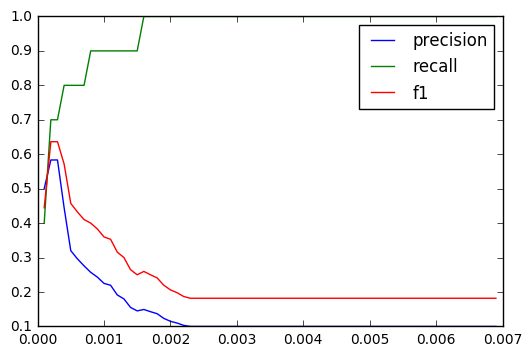

In [166]:
# Select threshold
npXval = np.array(mat['Xval'])
means = npXval.mean(0)
stds = npXval.std(0)
ps = p(npXval[:, 0], means[0], stds[0]) * p(npXval[:, 1], means[1], stds[1])

def calculate_scores(e):
    classification = ps < e
    cc = np.concatenate([classification.reshape(100, 1), np.array(mat['yval']).astype(bool)], axis=1)
    positives = cc[cc[:, 0] == True]
    negatives = cc[cc[:, 0] == False]
    true_positives = float(len(positives[positives[:, 1] == True]))
    false_positives = float(len(positives[positives[:, 1] == False]))
    false_negatives = float(len(negatives[negatives[:, 1] == True]))

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * precision * recall / (precision + recall)
    return [e, precision, recall, f1, len(positives)]

es = np.array([calculate_scores(x * 0.0001) for x in range(1, 70)])
plt.plot(es[:, 0], es[:, 1], label='precision')
plt.plot(es[:, 0], es[:, 2], label='recall')
plt.plot(es[:, 0], es[:, 3], label='f1')
plt.legend(loc='upper right')

In [167]:
es[es[:, 3] == es[:, 3].max()][0]

array([  2.00000000e-04,   5.83333333e-01,   7.00000000e-01,
         6.36363636e-01,   1.20000000e+01])